In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)  

In [2]:
df = df[df['job_title_short'] == 'Data Analyst']

In [3]:
df_exploded = df.explode('job_skills')

In [7]:
skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills','count'),
    median_salary=('salary_year_avg','median')
)

skill_stats = skill_stats.sort_values('skill_count',ascending=False).head(10)

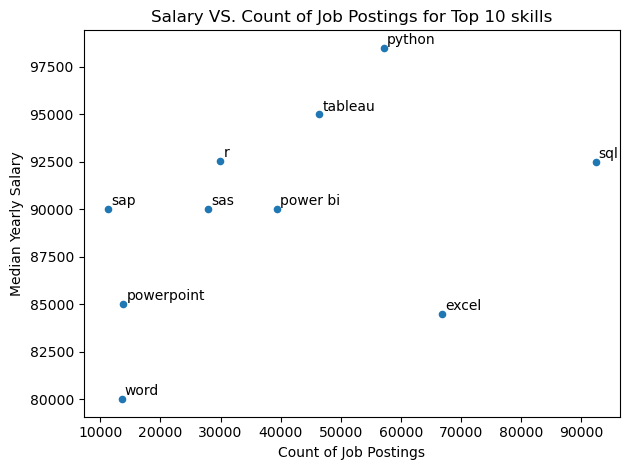

In [12]:
skill_stats.plot(kind='scatter',x='skill_count',y='median_salary')
plt.title('Salary VS. Count of Job Postings for Top 10 skills')
plt.ylabel('Median Yearly Salary')
plt.xlabel('Count of Job Postings')
plt.tight_layout()

for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i]+500,skill_stats['median_salary'].iloc[i]+200,txt)





plt.show()

In [13]:
# Filtramos los que no tienen sueldo y agrupamos
df_stats = df.dropna(subset=['salary_year_avg']).groupby('job_country')['salary_year_avg'].agg(['median', 'count'])

# Obtenemos los top 7 países con mejores sueldos (según el título de tu imagen)
df_top_7 = df_stats.sort_values(by='median', ascending=False).head(7)

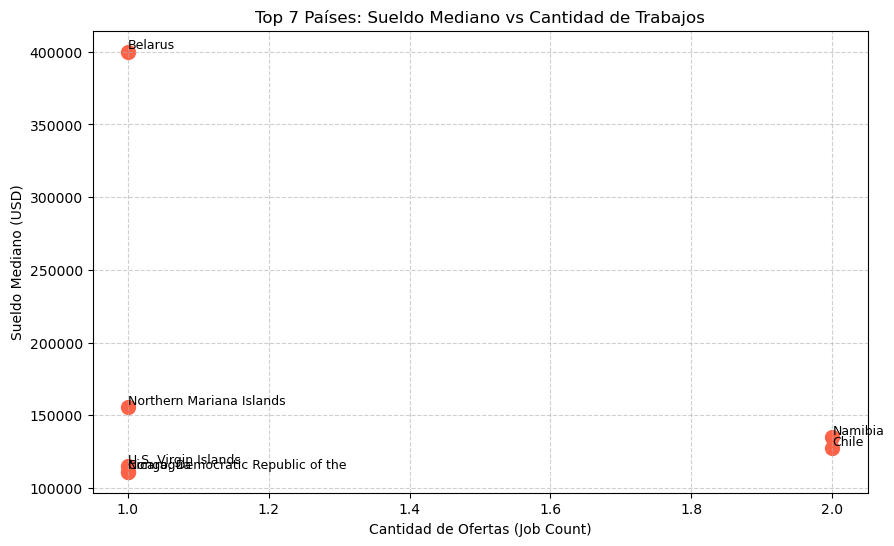

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Graficamos: X = cantidad de trabajos, Y = sueldo mediano
plt.scatter(df_top_7['count'], df_top_7['median'], color='tomato', s=100) # s es el tamaño del punto

# Agregamos etiquetas para que se entienda
plt.title('Top 7 Países: Sueldo Mediano vs Cantidad de Trabajos')
plt.xlabel('Cantidad de Ofertas (Job Count)')
plt.ylabel('Sueldo Mediano (USD)')
plt.grid(True, linestyle='--', alpha=0.6)

for i, country in enumerate(df_top_7.index):
    plt.text(df_top_7['count'].iloc[i], df_top_7['median'].iloc[i], country, fontsize=9, va='bottom')

plt.show()

In [ ]:
target_job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']

In [17]:
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
12,Data Analyst,Stagiaire Data Analyst (H/F) - Lyon (69006),"Lyon, France",via Jobijoba,Full-time and Internship,False,France,2023-12-22 13:24:41,False,False,France,None,NaN,NaN,Engie,"[sql, php, excel, power bi, sap, jira]","{'analyst_tools': ['excel', 'power bi', 'sap']..."
18,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,None,NaN,NaN,Glovo,"[sql, python, r, redshift, pandas, excel, look...","{'analyst_tools': ['excel', 'looker', 'tableau..."
31,Data Analyst,Stage - Data Analyst F/H,"Paris, France",via LinkedIn,Full-time and Internship,False,France,2023-10-19 13:59:31,False,False,France,None,NaN,NaN,GROUPE BON MARCHÉ : Le Bon Marché Rive Gauche ...,[sql],{'programming': ['sql']}
34,Data Analyst,Data Analyst als Marketing Manager Automation ...,"Erlangen, Germany",via Central Illinois Proud Jobs,Full-time,False,Germany,2023-02-23 13:31:28,True,False,Germany,None,NaN,NaN,DEFACTO GmbH,[sap],{'analyst_tools': ['sap']}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None
785705,Data Analyst,Expert Business Data Analyst - Now Hiring,"Oakland, CA",via Snagajob,Full-time,False,"California, United States",2023-01-09 06:00:25,False,False,United States,None,NaN,NaN,PG&E Corporation,"[sql, python, tableau]","{'analyst_tools': ['tableau'], 'programming': ..."
785715,Data Analyst,Amul Careers 2023 - Apply Online - Data Analys...,India,melalui Jobsleworld - Jobs In India - Job Vaca...,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Amul,None,None
785717,Data Analyst,Data & Analytics Architect (w/m/x),"Erfurt, Jerman",melalui LinkedIn,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,NTT DATA DACH,"[aws, azure]","{'cloud': ['aws', 'azure']}"
